In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='year', ylabel='tmean'>

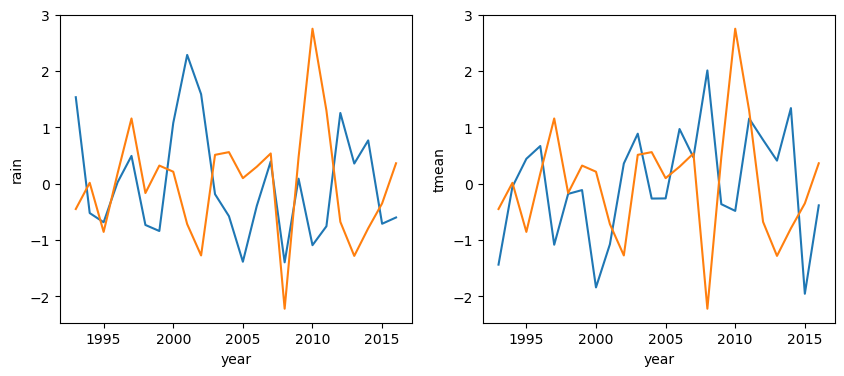

In [3]:
era_features = pd.read_csv("data/ERA5/era_basic_preprocessed_filtered_feature_structure_1993_2016.csv")

national_yield = pd.read_csv("data/crop/national_yield_detrended.csv")
era_agg = (era_features.set_index("year").loc[:, [c for c in era_features.columns if ("rain" in c)]].mean(axis=1).reset_index()
           .merge(era_features.set_index("year").loc[:, [c for c in era_features.columns if ("tmean" in c)]].mean(axis=1).reset_index()
                  .merge(national_yield[["year", "yield anomaly [%]"]], on="year"), on="year"))

era_agg.columns = ["year", "rain", "tmean", "yield"]

era_agg[["rain", "tmean", "yield"]] = (era_agg[["rain", "tmean", "yield"]] - era_agg[["rain", "tmean", "yield"]].mean()) / era_agg[["rain", "tmean", "yield"]].std()

fig, ax = plt.subplots(1,2, figsize=(10,4))
axs = ax.ravel()

sns.lineplot(data=era_agg, x="year", y="rain", ax=axs[0])
sns.lineplot(data=era_agg, x="year", y="yield", ax=axs[0])

sns.lineplot(data=era_agg, x="year", y="tmean", ax=axs[1])
sns.lineplot(data=era_agg, x="year", y="yield", ax=axs[1])